In [1]:
######## CHANGE VALUES OF THESE PARAMS TO GET DIFFERENT PLOTS
eval_metric = 'mrr' # avg_num_agreement, mrr
threshold = 0.90 # threshold for x-axis cutoff
top1 = F

In [2]:
# load results (on iMac)
RESULTS_DIR = '/Volumes/deepdata/bayesian_blackbox/output_from_datalab_20200128/output/active_learning_topk/'
PSEUDOCOUNT = 2
RUNS = 100
LOG_FREQ = 100
TOPK_DICT = {'cifar100':10, 
             'imagenet':10,
             'svhn':3, 
             '20newsgroup':3,
             'dbpedia':3 }
DATASET_NAMES = {
    'cifar100': 'CIFAR-100',
    'imagenet': 'ImageNet',
    'svhn': 'SVHN',
    '20newsgroup': '20 Newsgroups',
    'dbpedia': 'DBpedia',
}
EVAL_METRIC_NAMES = {
    'avg_num_agreement': '#agreements',
    'mrr': 'MRR'
}
COLOR = {'non-active_no_prior': 'non-active', 
        'non-active_uniform': 'non-active_uniform',
        'non-active_informed': 'non-active_informed',
        'ts_uniform': 'ts(uniform)', 
        'ts_informed': 'ts(informative)'
        }
METHOD_NAME_DICT = {'non-active_no_prior': 'non-active', 
#                         'non-active_uniform': 'non-active_uniform',
#                         'non-active_informed': 'non-active_informed',
                    'ts_uniform': 'ts(uniform)', 
                    'ts_informed': 'ts(informative)'}
METRIC = 'accuracy'
MODE = 'min'

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Any
import matplotlib.ticker as ticker


from data_utils import datafile_dict, num_classes_dict, prepare_data, datasize_dict
DEFAULT_RC = {
    'font.size': 8,
    'font.family': 'serif',
    'font.serif': ['Times'],
    # 'text.usetex': True,
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'legend.fontsize': 5,
    'legend.loc': 'lower right',
    'figure.titlesize': 8,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
}


DEFAULT_PLOT_KWARGS = {
    'linewidth': 1
}

COLUMN_WIDTH = 3.25  # Inches
TEXT_WIDTH = 6.299213  # Inches
GOLDEN_RATIO = 1.61803398875

In [4]:
def plot_topk_accuracy(ax: mpl.axes.Axes, 
                       experiment_name: str, 
                       eval_metric:str, 
                       pool_size:int, 
                       plot_kwargs: Dict[str, Any] = {}) -> None:
    """
    Replicates Figure 2 in [CITE PAPER].

    Parameters
    ===
    experiment_name: str. 
        Experimental results were written to files under a directory named using experiment_name.
    eval_metric: str. 
        Takes value from ['avg_num_agreement', 'mrr']
    pool_size: int.
        Total size of pool from which samples were drawn.
    plot_kwargs : dict.
        Keyword arguments passed to the plot.
    Returns
    ===
    fig, axes : The generated matplotlib Figure and Axes.
    """
    
    _plot_kwargs = DEFAULT_PLOT_KWARGS.copy()
    _plot_kwargs.update(plot_kwargs)
    
    benchmark = 'ts_informed'
            
    for method in METHOD_NAME_DICT:
        metric_eval = np.load(
            RESULTS_DIR + experiment_name + ('%s_%s.npy' % (eval_metric, method))).mean(axis=0)
        x = np.arange(len(metric_eval)) * LOG_FREQ / pool_size
        ax.plot(x, metric_eval, label=METHOD_NAME_DICT[method], **_plot_kwargs)
        
        if method == benchmark:
            cutoff = list(map(lambda i: i > threshold, metric_eval.tolist())).index(True)
            if cutoff:
                cutoff = min(int(cutoff * 2.5), len(metric_eval) - 1)
            else:
                cutoff = len(metric_eval) - 1
    
    
    ax.set_xlim(0, cutoff * LOG_FREQ / pool_size)
    ax.set_ylim(0, 1.0)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(0, cutoff * LOG_FREQ / pool_size, 0.20))
    ax.yaxis.set_ticks(np.arange(0, 1.01, 0.20))
    
    return ax

cifar100
imagenet
svhn
20newsgroup
dbpedia


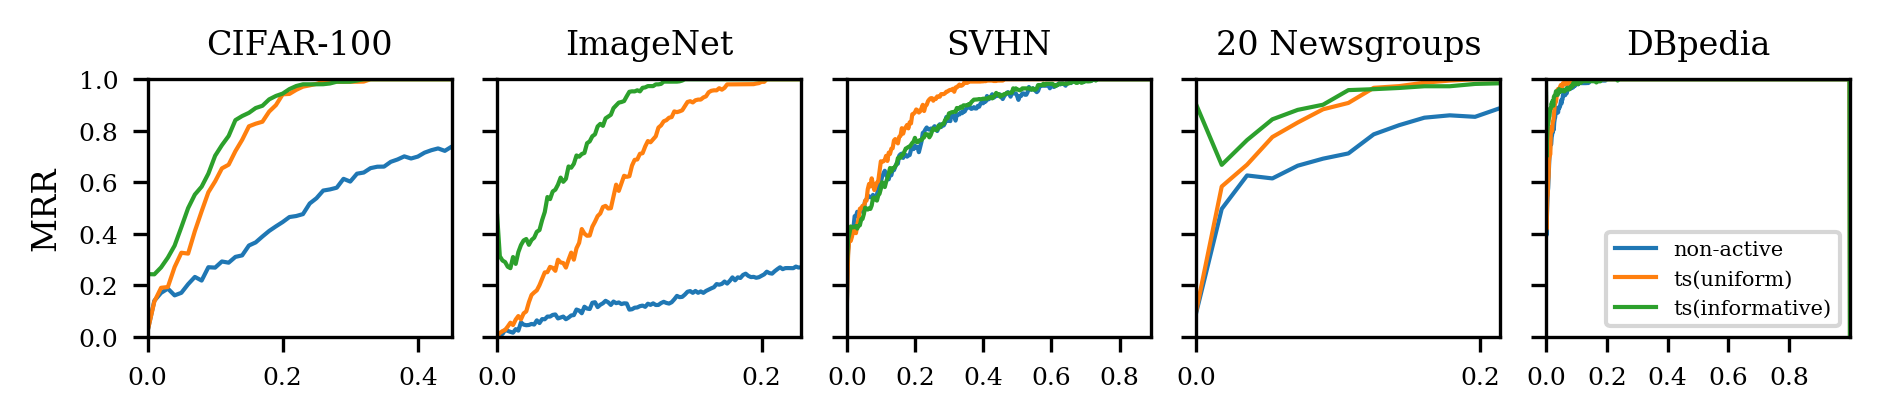

In [5]:
with mpl.rc_context(rc=DEFAULT_RC):
    fig, axes = plt.subplots(ncols=len(TOPK_DICT), dpi=300, sharey=True)
    idx = 0
    for dataset in TOPK_DICT:
        print(dataset)
        if top1:
            topk = 1
        else:
            topk = TOPK_DICT[dataset]
        experiment_name = '%s_%s_%s_top%d_runs%d_pseudocount%.2f/' % \
            (dataset, METRIC, MODE, topk, RUNS, PSEUDOCOUNT)
        plot_kwargs = {}
        plot_topk_accuracy(axes[idx], 
                           experiment_name, 
                           eval_metric, 
                           datasize_dict[dataset], 
                           plot_kwargs=plot_kwargs)
        # axes[idx].set_xlabel('%s, top %d' % (DATASET_NAMES[dataset], TOPK_DICT[dataset]))
        axes[idx].set_title(DATASET_NAMES[dataset])
        idx += 1
    
    axes[-1].legend()
    axes[0].set_ylabel(EVAL_METRIC_NAMES[eval_metric])
    fig.tight_layout()
    fig.set_size_inches(TEXT_WIDTH, 1.1)
    fig.subplots_adjust(bottom=0.15, wspace=0.15)

if top1:
    figname = '../figures/%s_%s_%s_top1.pdf' % (METRIC, MODE, eval_metric)
else:
    figname = '../figures/%s_%s_%s_topk.pdf' % (METRIC, MODE, eval_metric)
fig.savefig(figname, bbox_inches='tight')